In [2]:
import xml.etree.ElementTree as ET
from pathlib import Path
from PIL import Image
import math  

In [3]:
path = Path.cwd() / 'anno_test'

In [4]:
files = path.glob('**/*.xml')
files = [x for x in files]
file = files[0]

In [5]:
tree = ET.parse(file)
root = tree.getroot()

In [10]:
for child in root:
    print(child.tag)

folder
filename
size
segmented
object
object
object
object
object


In [4]:
image_path = Path.cwd() / 'WinaData'
im = Image.open(image_path / root[1].text)

NameError: name 'root' is not defined

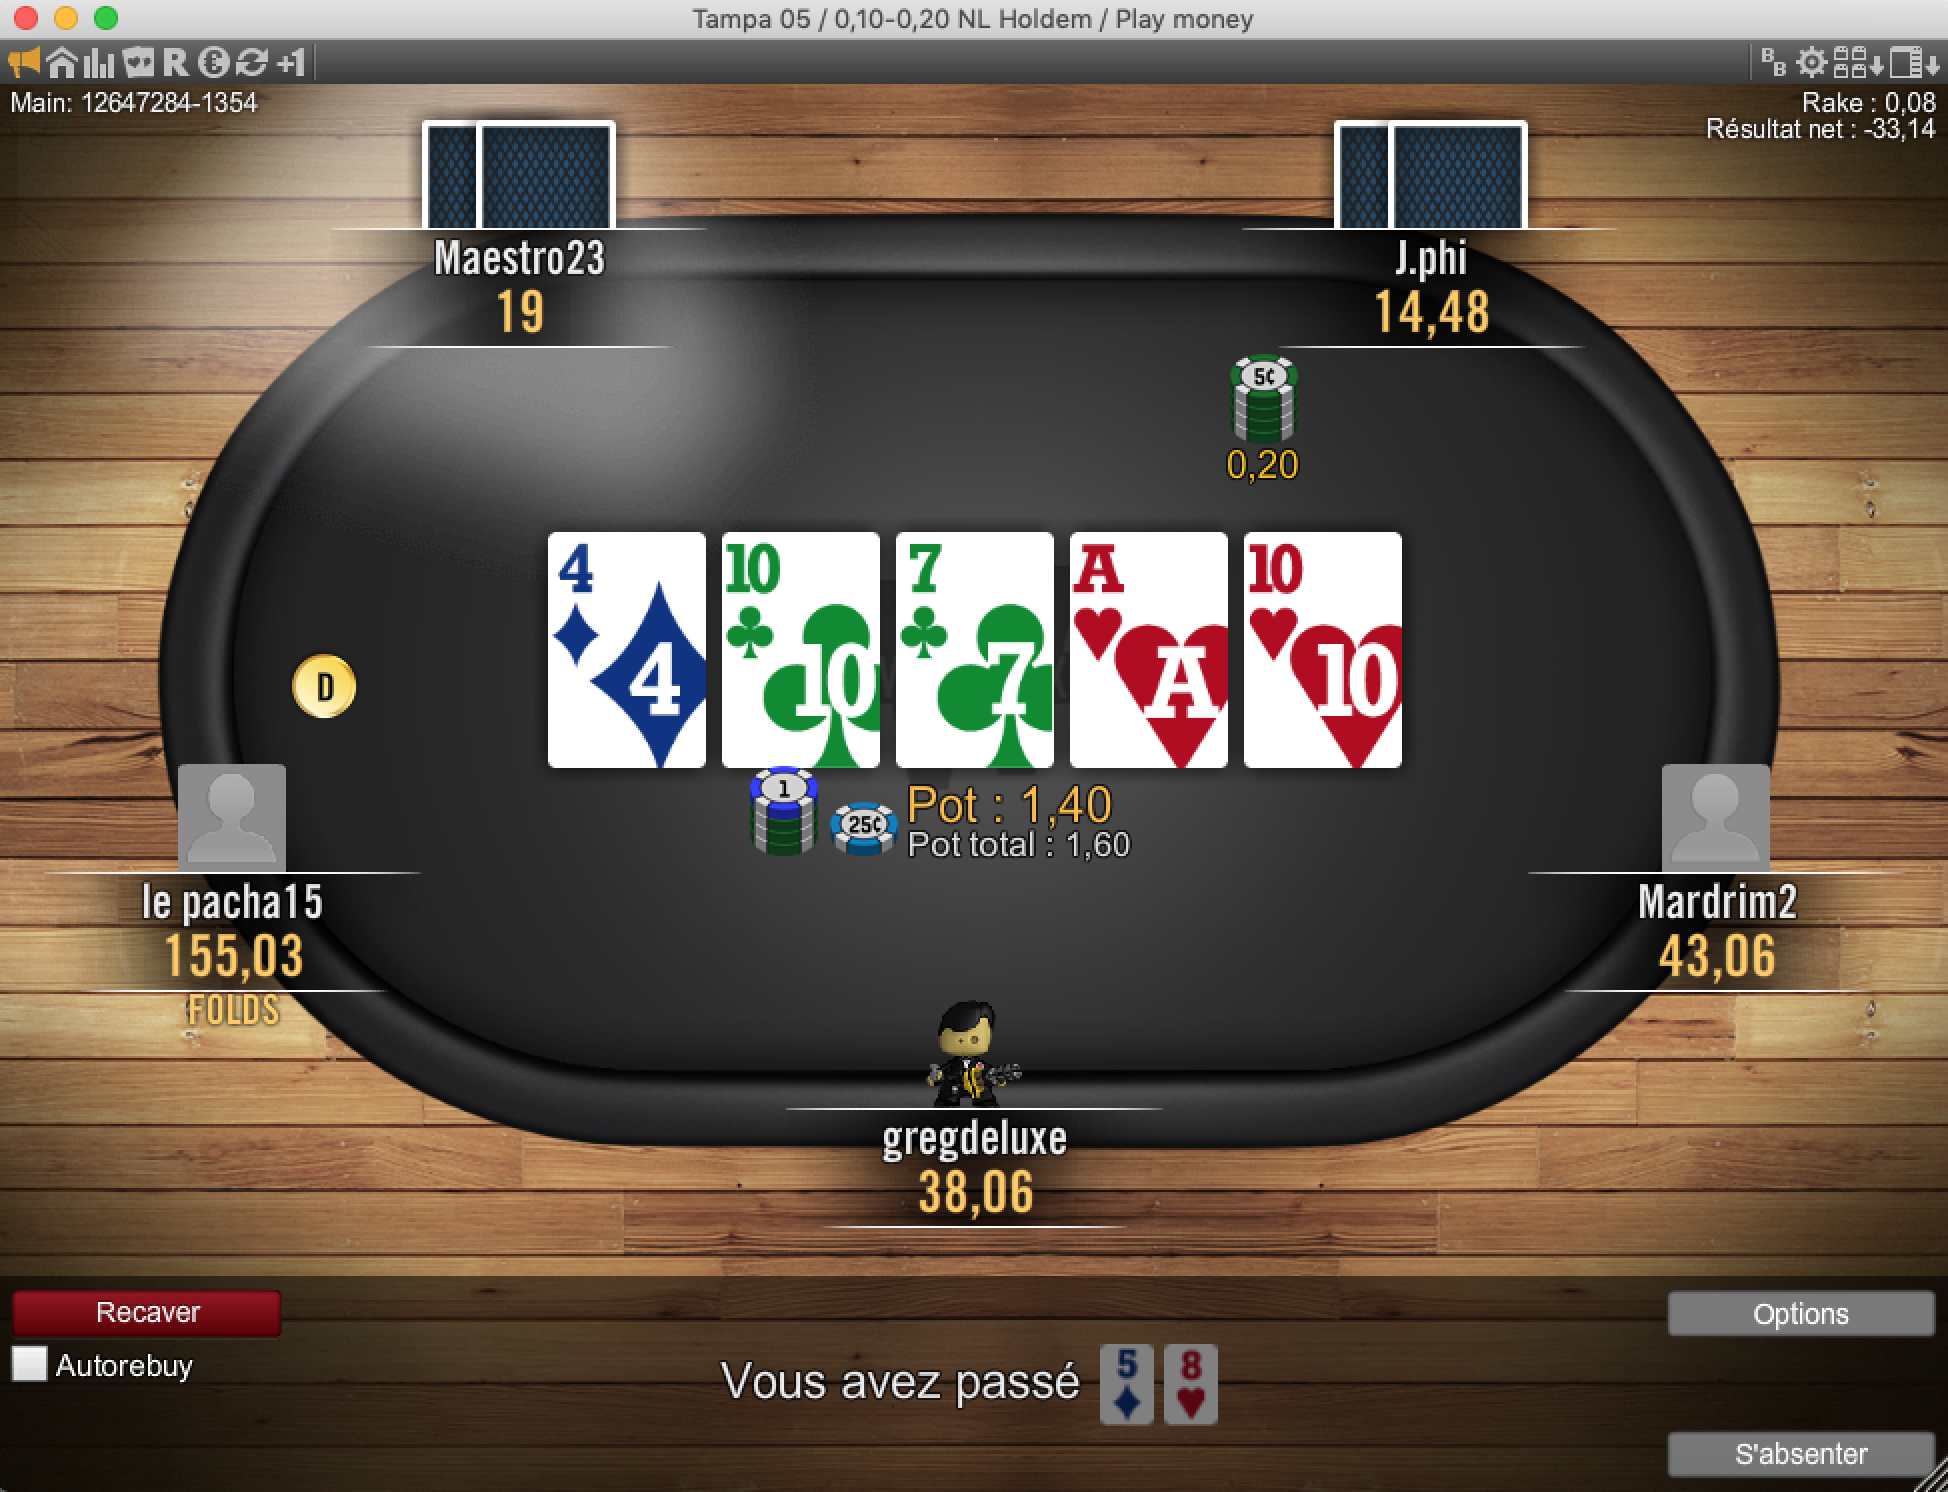

In [7]:
im

In [42]:
im.size

(1948, 1492)

In [56]:
card_name = root[-1][0].text
card_name

'card-4-diamond'

In [52]:
xmin = int(root[-1][5][0].text)
ymin = int(root[-1][5][1].text)
xmax = int(root[-1][5][2].text)
ymax = int(root[-1][5][3].text)
(xmin, ymin, xmax, ymax)

(551, 533, 707, 768)

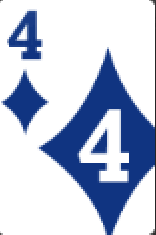

In [53]:
im.crop((xmin, ymin, xmax, ymax))

In [59]:
card_images = Path.cwd()/'card_images'
im.crop((xmin, ymin, xmax, ymax)).save(card_images / f'{card_name}.png')

In [65]:
for file in files:
    tree = ET.parse(file)
    root = tree.getroot()
    cards = [x for x in root if x.tag == 'object']
    for card in cards:
        card_name = card[0].text
        xmin = int(card[5][0].text)
        ymin = int(card[5][1].text)
        xmax = int(card[5][2].text)
        ymax = int(card[5][3].text)
        im.crop((xmin, ymin, xmax, ymax)).save(
            card_images / f'{card_name}.png')
    

In [6]:
root[1].text

'Screenshot 2019-04-08 at 02.40.55.png'

In [18]:
image_path = Path.cwd() / 'WinaData'
background = Image.open(image_path / 'Screenshot 2019-04-08 at 02.17.13.png')

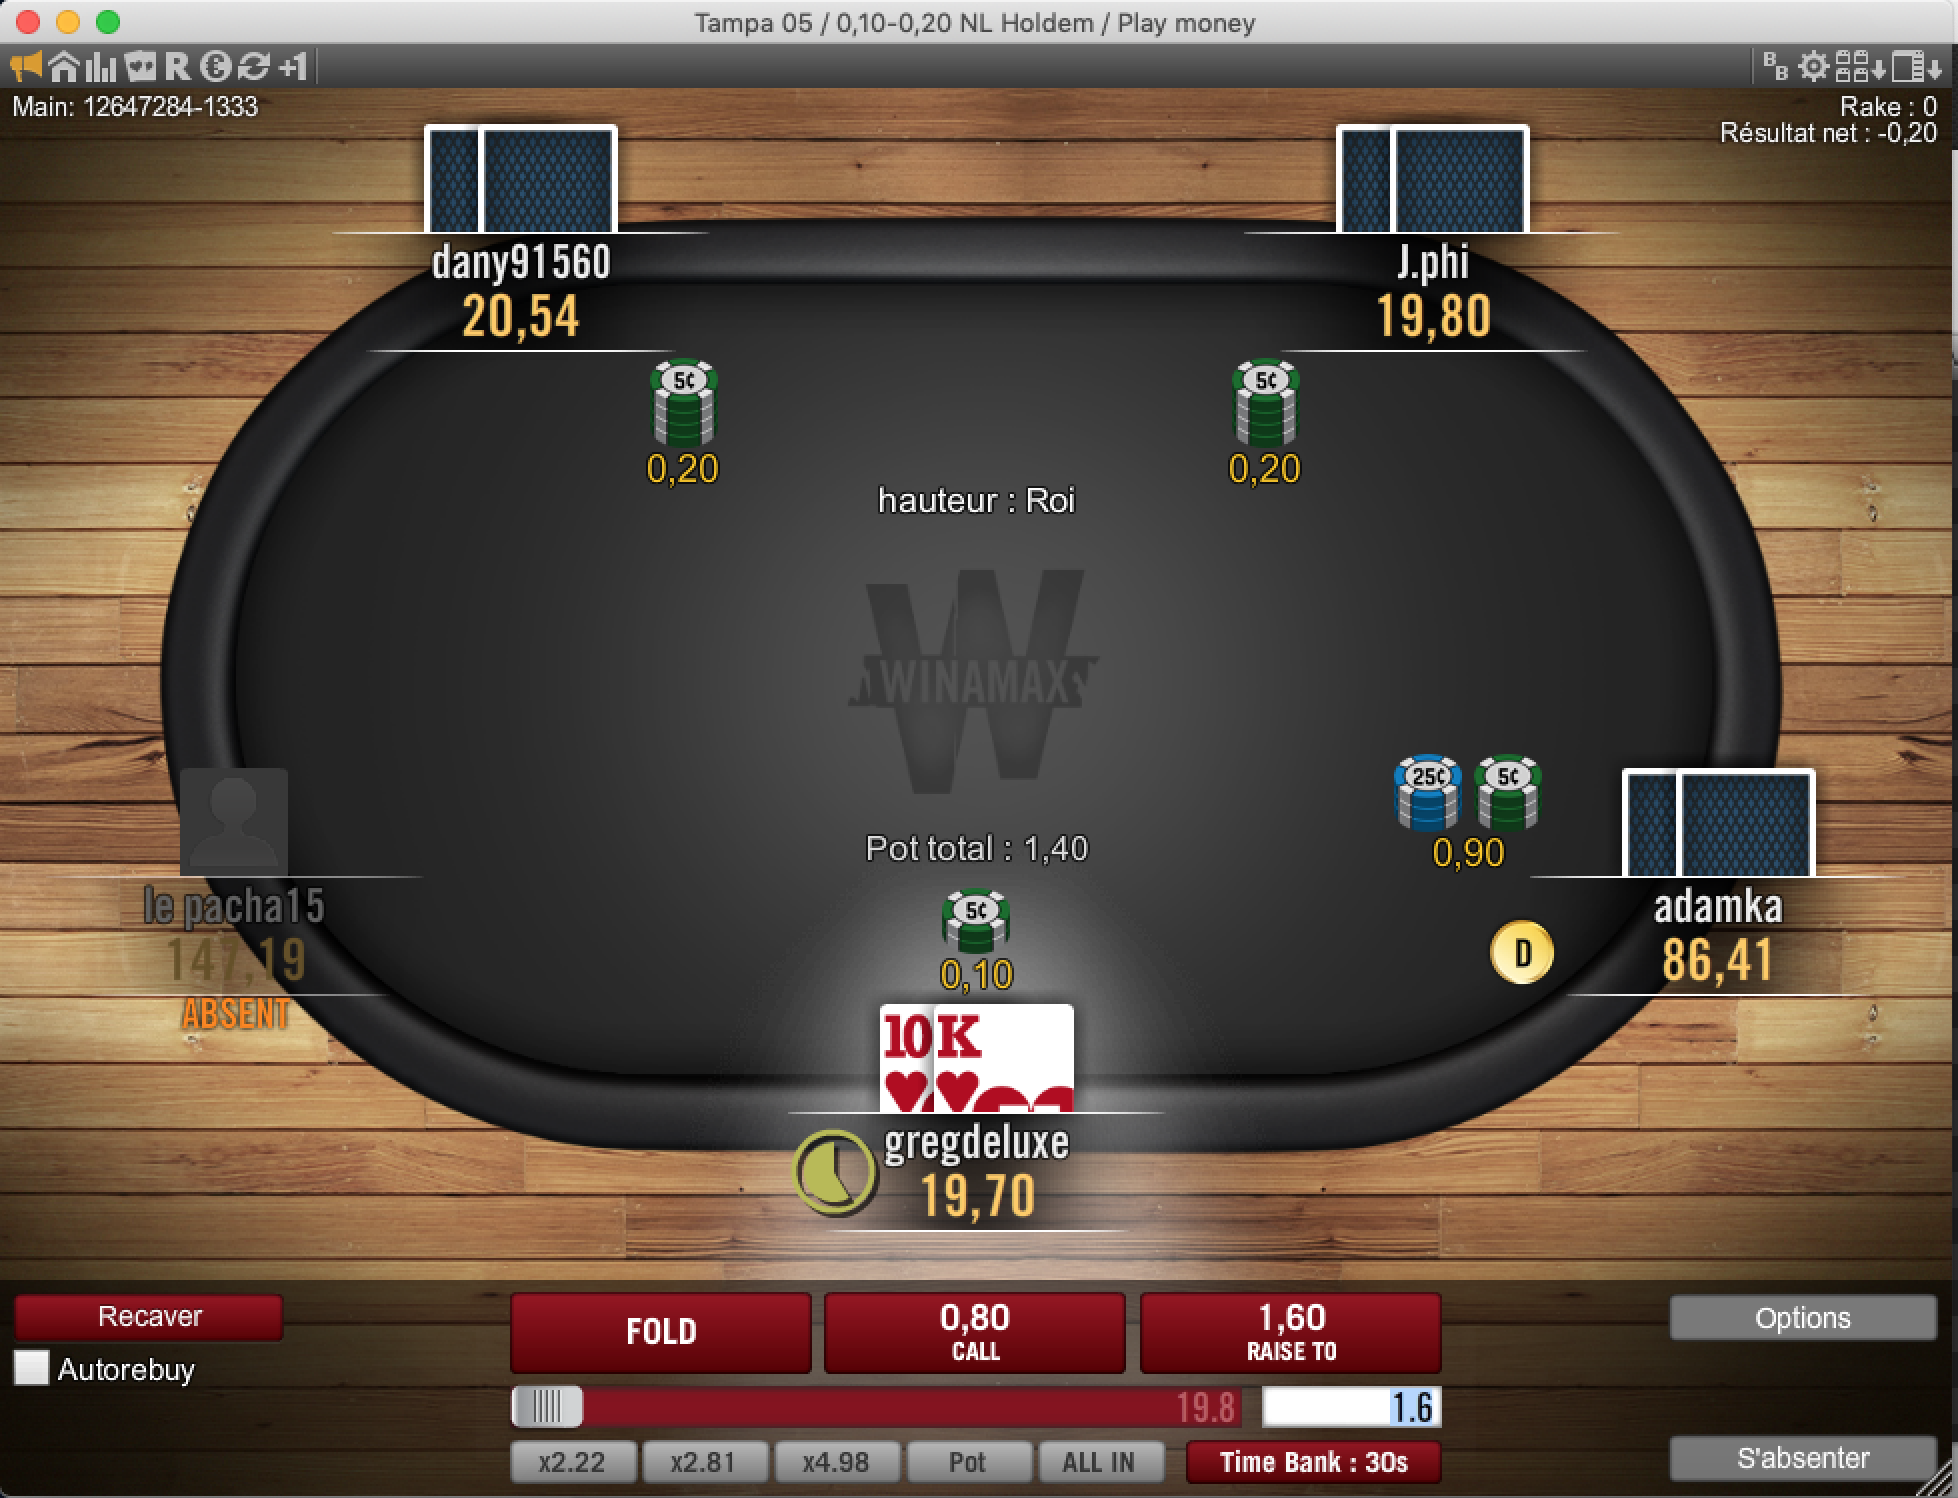

In [8]:
background

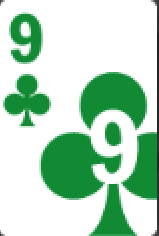

In [53]:
cards_path = Path.cwd() / 'card_images'
card10c = Image.open(cards_path / 'card-10-club.png')
card9c = Image.open(cards_path / 'card-9-club.png')

card9c

In [47]:
width, height = card.size
width, height

(159, 237)

In [1]:
out10c = card10c.resize((159, 237))


box = ( 0, 0, math.ceil(width), math.ceil(height/2))

region10c = out10c.crop(box)
region10c


NameError: name 'card10c' is not defined

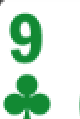

In [56]:
out9c = card9c.resize((159, 237))

box = ( 0, 0, math.ceil(width/2.1), math.ceil(height/2))
region9c = out9c.crop(box)
region

In [32]:

width, height = card.size
width, height

(159, 237)

In [33]:
background = Image.open(image_path / 'Screenshot 2019-04-08 at 02.17.13.png')
background.paste(card, (551, 537))

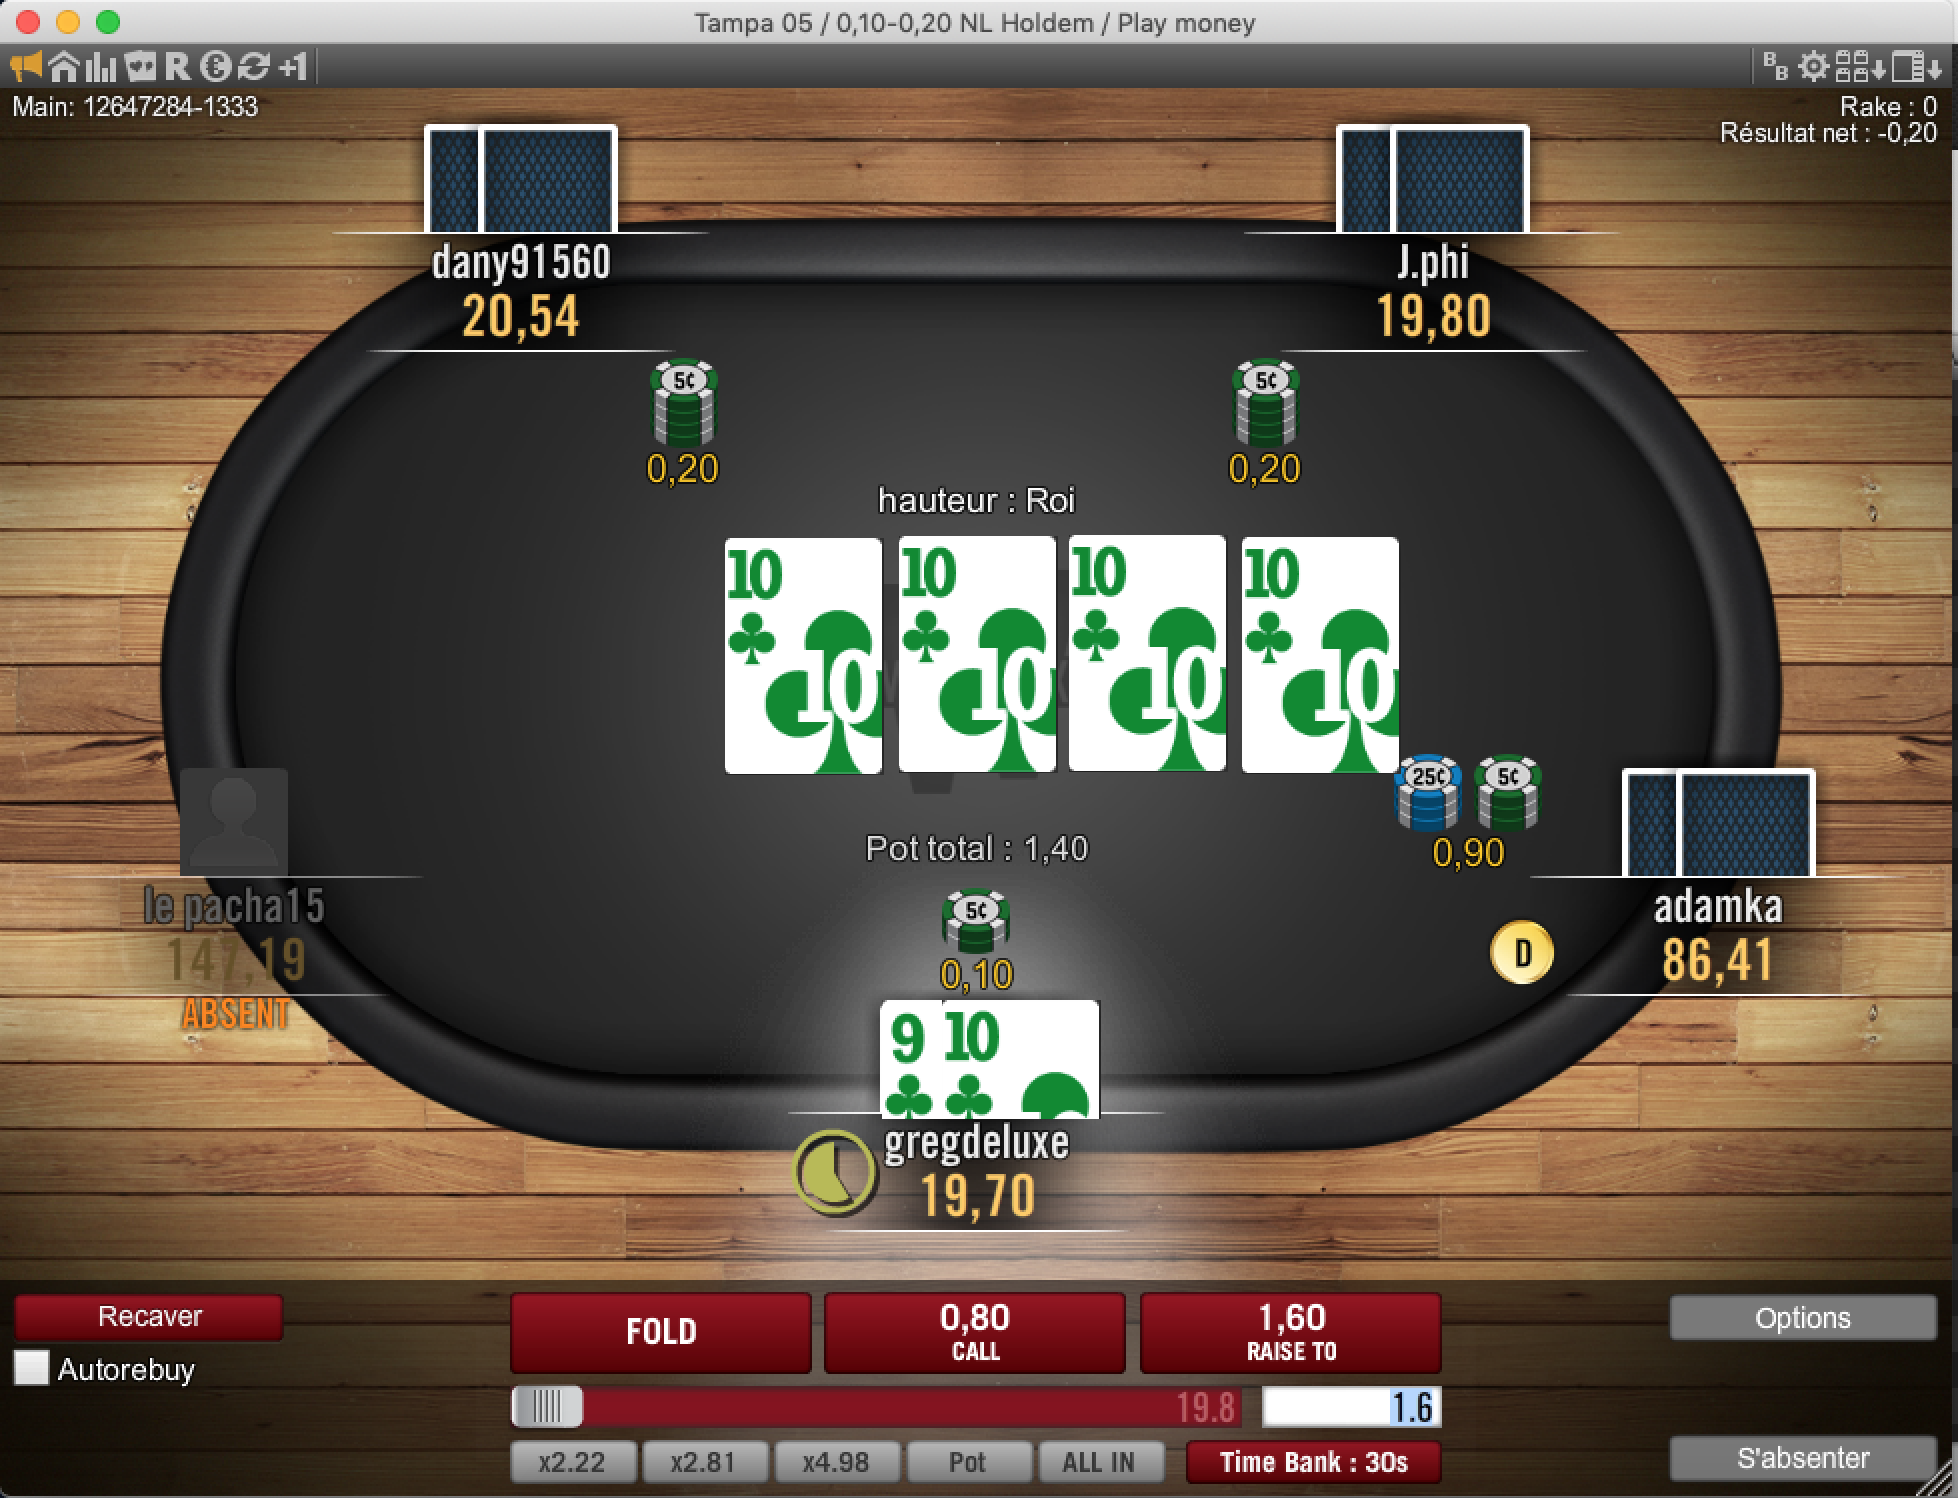

In [61]:
background = Image.open(image_path / 'Screenshot 2019-04-08 at 02.17.13.png')
background.paste(region9c, (882, 1000))
background.paste(region10c, (942, 1000))
background.paste(card, (725, 538))
background.paste(card, (899,536))
background.paste(card, (1069, 535))
background.paste(card, (1242, 537))
background

# Pair Generator

In [2]:
from pathlib import Path
from PIL import Image
import math
from itertools import combinations

In [3]:
image_path = Path.cwd() / 'resources'

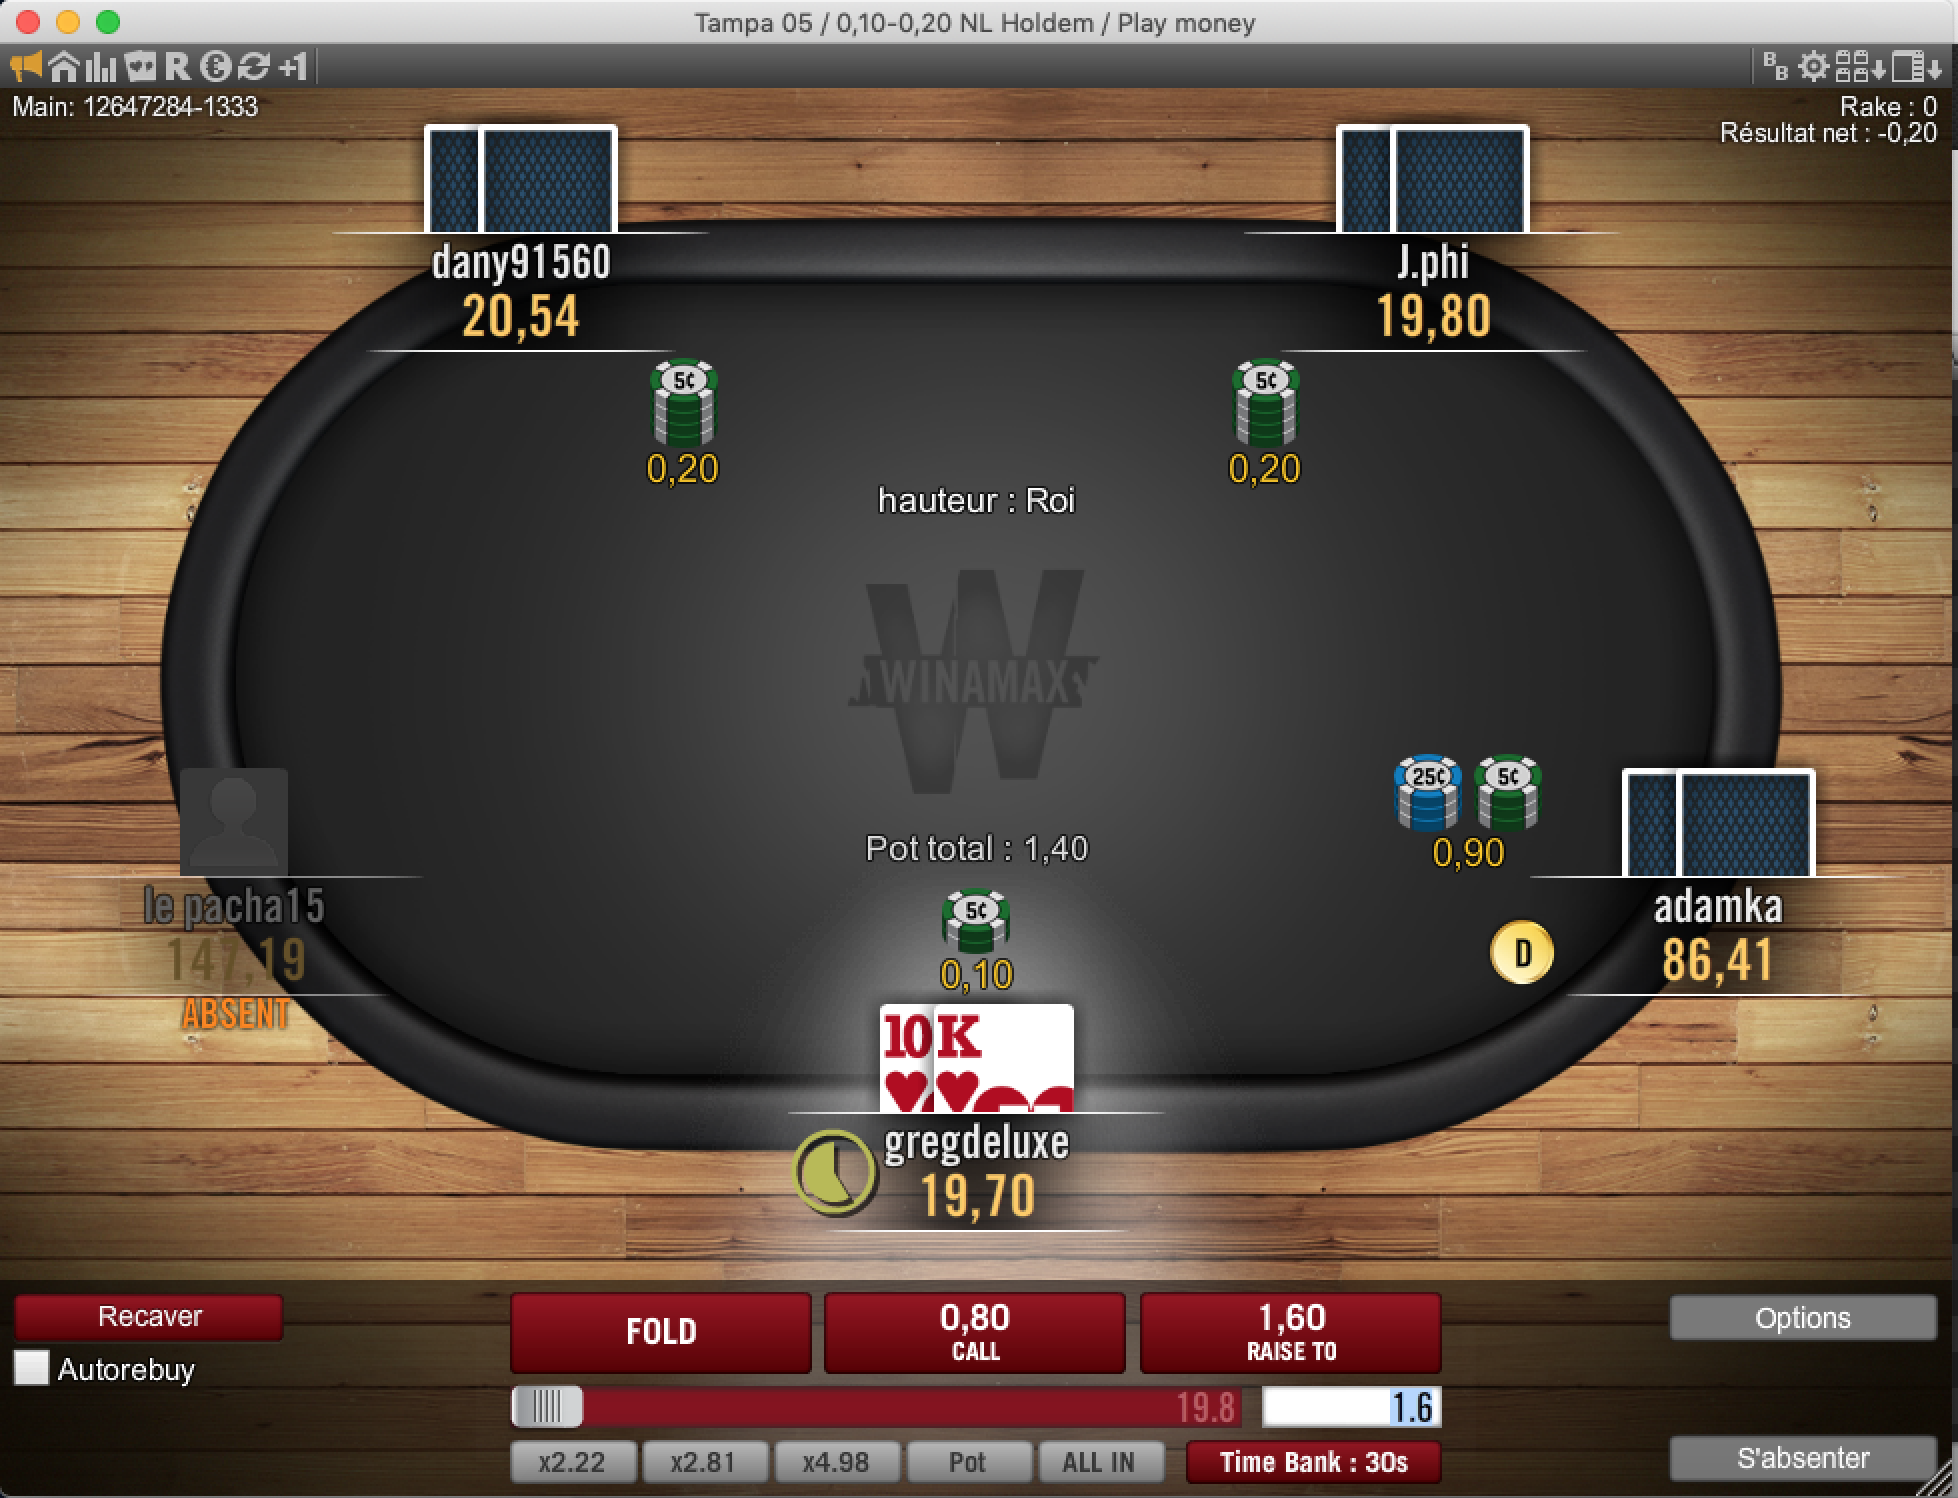

In [6]:
background = Image.open(image_path / 'Screenshot 2019-04-08 at 02.17.13.png') ; background

In [ ]:
path_cards = Path.cwd() / 'resources' / 'card_images'

def pasteLeftCard(card, background):
    width, height = card.size
    out = card.resize((159, 237))
    box = (0, 0, math.ceil(width/2.1), math.ceil(height/2))
    region = out.crop(box)
    background.paste(region, (882, 1000))
    return background

def pasteRightCard(card, background):
    width, height = card.size
    out = card.resize((159, 237))
    box = (0, 0, math.ceil(width), math.ceil(height/2))
    region = out.crop(box)
    background.paste(region, (942, 1000))
    return background

In [ ]:
path_cards = Path.cwd() / 'resources' / 'card_images'
files = path_cards.glob('**/*.png')
files = [x for x in files]
file = files[0] ; file

In [ ]:
cardA = Image.open(files[0]) ; cardA

In [5]:
for pathA, pathB in combinations(files, 2):
    background = Image.open(image_path / 'Screenshot 2019-04-08 at 02.17.13.png')
    cardA = Image.open(pathA)
    cardB = Image.open(pathB)
    background = pasteLeftCard(cardA, background)
    background = pasteRightCard(cardB, background)
    background.save(Path.cwd()/ 'pairs' / f'{pathA.stem}_{pathB.stem}.png')
    

NameError: name 'files' is not defined

# Card Image Classification

In [8]:
import matplotlib
import sys
import tensorflow as tf
from tensorflow import keras
import time